--- PHASE 2: BASIC DATASET INSPECTION ---

First 5 Rows:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null  

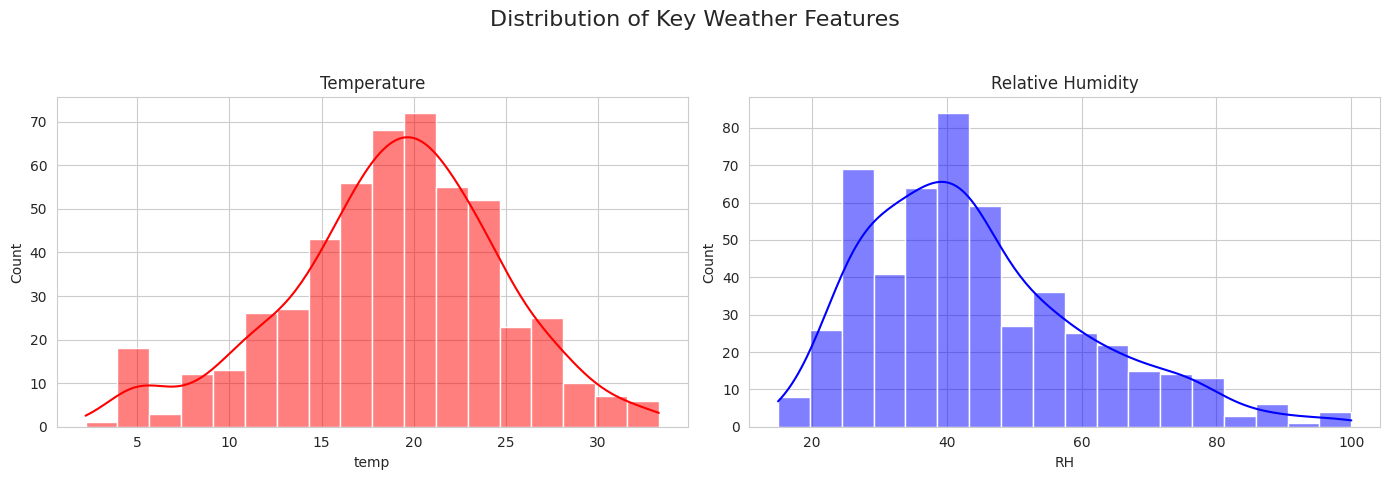

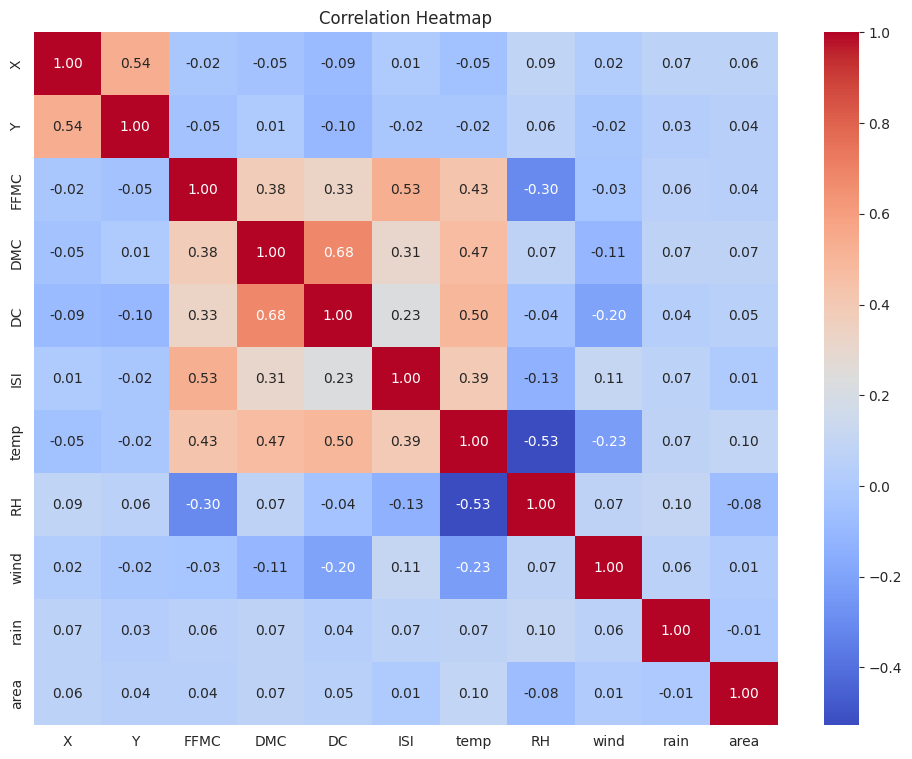



--- PHASE 4: DATA TRANSFORMATION ---


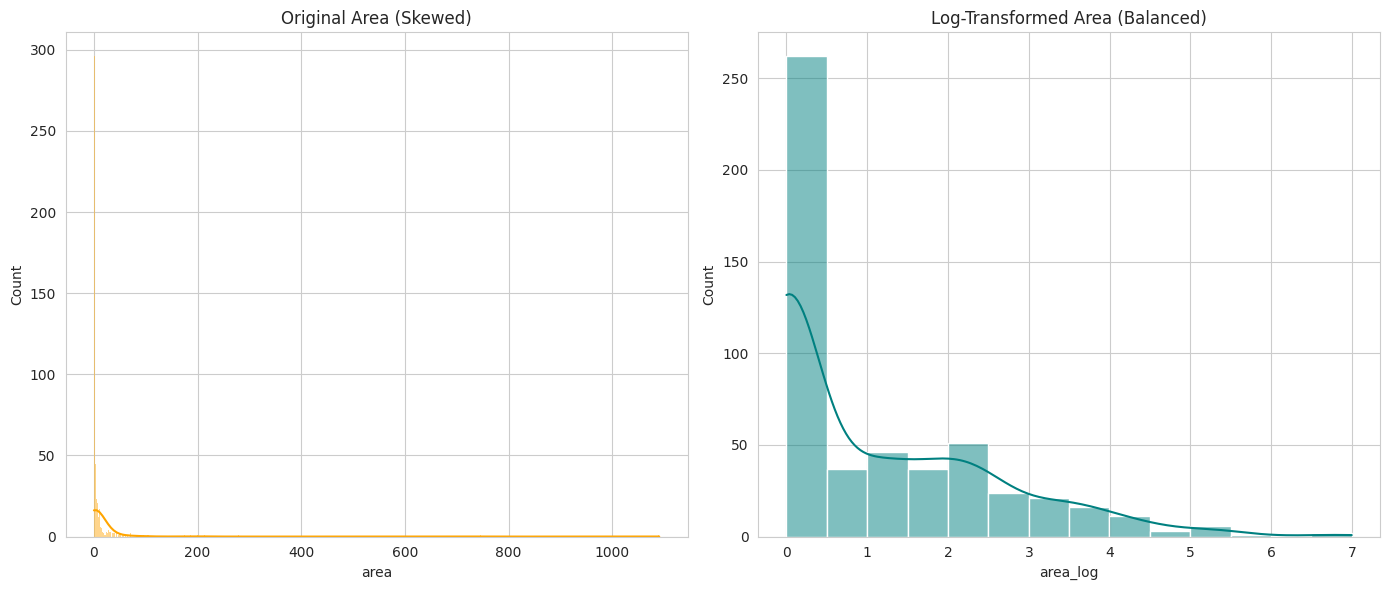



--- PHASE 5: BUILDING THE PREDICTIVE MODEL ---
Data split into 413 training samples and 104 testing samples.
Model training complete.

Model Evaluation on Test Data:
Mean Squared Error (MSE): 2.1736467531529597

--- MISSION COMPLETE ---


In [1]:
# ==============================================================================
# MISSION BRIEFING: SIH WEEK 3 - WILDFIRE PREDICTION
# OBJECTIVE: Perform EDA, data transformation, and build a baseline predictive model.
# ==============================================================================


# PHASE 1: SETUP
# ------------------------------------------------------------------------------
# Import the necessary toolkits.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Configure the visual style for all plots.
sns.set_style("whitegrid")

# Load the dataset into a DataFrame.
file_name = '/content/drive/MyDrive/Colab Notebooks/forestfires.csv'
df = pd.read_csv(file_name, encoding='latin-1')


# PHASE 2: BASIC INSPECTION
# ------------------------------------------------------------------------------
print("--- PHASE 2: BASIC DATASET INSPECTION ---")
print("\nFirst 5 Rows:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values Check:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")


# PHASE 3: EXPLORATORY DATA ANALYSIS (VISUALIZATION)
# ------------------------------------------------------------------------------
print("--- PHASE 3: EXPLORATORY DATA ANALYSIS ---")

# Visualize the distribution of key features.
plt.figure(figsize=(14, 5))
plt.suptitle('Distribution of Key Weather Features', fontsize=16)
plt.subplot(1, 2, 1)
sns.histplot(df['temp'], kde=True, color='red').set_title('Temperature')
plt.subplot(1, 2, 2)
sns.histplot(df['RH'], kde=True, color='blue').set_title('Relative Humidity')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualize the correlation matrix to understand relationships.
plt.figure(figsize=(12, 9))
plt.title('Correlation Heatmap')
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
print("\n" + "="*50 + "\n")


# PHASE 4: DATA TRANSFORMATION
# ------------------------------------------------------------------------------
print("--- PHASE 4: DATA TRANSFORMATION ---")

# Apply a log(1+x) transform to the 'area' column to correct for its heavy skew.
df['area_log'] = np.log1p(df['area'])

# Visualize the "before and after" to prove the transformation worked.
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['area'], kde=True, color='orange').set_title('Original Area (Skewed)')
plt.subplot(1, 2, 2)
sns.histplot(df['area_log'], kde=True, color='teal').set_title('Log-Transformed Area (Balanced)')
plt.tight_layout()
plt.show()
print("\n" + "="*50 + "\n")


# PHASE 5: MODELING
# ------------------------------------------------------------------------------
print("--- PHASE 5: BUILDING THE PREDICTIVE MODEL ---")

# 1. Select Features (the inputs) and Target (the output).
features = ['temp', 'RH', 'wind', 'ISI', 'DMC']
target = 'area_log'
X = df[features]
y = df[target]

# 2. Split data into training and testing sets.
# The model learns from the training set and is evaluated on the unseen testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

# 3. Create and Train the Linear Regression model.
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training complete.")

# 4. Make Predictions and Evaluate the Model.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nModel Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse}")
print("\n--- MISSION COMPLETE ---")